In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy

Iteration    0: Cost 37840.46   
Iteration  100: Cost     0.00   
Iteration  200: Cost     0.00   
Iteration  300: Cost     0.00   
Iteration  400: Cost     0.00   
Iteration  500: Cost     0.00   
Iteration  600: Cost     0.00   
Iteration  700: Cost     0.00   
Iteration  800: Cost     0.00   
Iteration  900: Cost     0.00   
b,w found by gradient descent: 290.00,[ 38.05161505  41.54327451 -30.98894656  36.34177447] 
prediction: 460.00, target value: 460
prediction: 232.00, target value: 232
prediction: 178.00, target value: 178


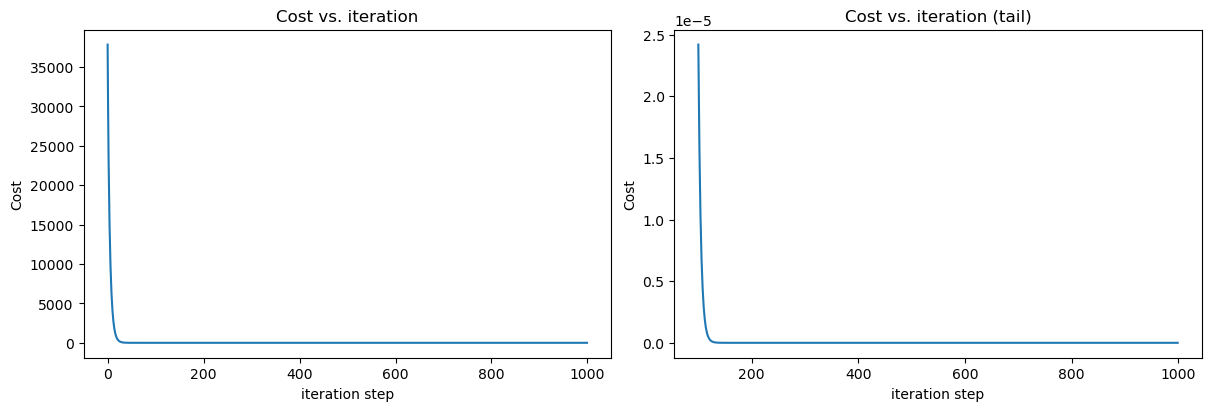

In [18]:
#FROM MULTIPLE VARIABLE LINEAR REGRESSION
#Data set: housing price prediction. Training set contains three examples with four features (size (sqft, not 1000 sqft), bedrooms, floors, and age)

#Step 1: input training set as numpy array. As we are trying to predict price from the features, this is y variable, whereas the features are x (the input)
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]]) #storing training dataset in a NumPy matrix, each row of maxtrix represents one example (this is a 3,4 matrix with 3 training examples down y-axis and four features going across. So a row represents a full training example, and a column represents all the values from all the training examples for one feature)
y_train = np.array([460, 232, 178]) #this is a 1D array, not a matrix

#Step 2: store w as a vector with n elements (here, n is 4, as there are four features); b is scalar. Choose initial values of parameters w and b.
b_init = 785.1811367994083 #initialize w and b
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

#Step 3: To predict f_wb, or p here, we use a dot product (unlike just multiplying for a single variable).
def predict (x, w, b):
    p = np.dot(x, w) + b #does same as looping through all training examples i, but faster (n = x.shape[0]; p = 0; for i in range(n): p_i = x[i] * w[i]; p = p + p_i; p = p + b; return p)
    return p

#Step 4: Compute cost function
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(x[i], w) + b #calculate prediction
        cost = cost + (f_wb_i - y[i]) ** 2 #update total cost with squared error difference between prediction and real value
    cost = cost / (2 * m) #average cost per training example (?)
    return cost

#Step 5: Use gradient descent to minimise cost and therefore find optimal parameters w and b
def compute_gradient(x, y, w, b): #define function
    m = x.shape[0]
    n = x.shape[1] #get number of features (columns in x)
    dj_dw = np.zeros((n,)) #initialized as a zero vector of size n to accumulate the gradient for each weight
    dj_db = 0 #a scalar to accumulate the gradient for the bias; initialized to zero
    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i] #error calculation: computes predict value for ith example (going down matrix) using current weights and bias b, before subtracting the actual target value from the prediction to calculate the error err
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x[i, j] #within each training example i, iterates over all n features (across matrix); for each feature, the gradient dj_dw is accumulated by multiplying the error (equal to (np.dot(X[i], w) - y[i])) by X[i, j] for each feature. As dj_dw = 1/m SUM(err * X[i,j])
        dj_db = dj_db + err #gradient for bias error is updated as dj_db = 1/m SUM(err) = 1/m SUM(f_wb(x[i]) - y[i]), which here = 1/m SUM(np.dot(X[i],w) - y[i])               
    dj_dw = dj_dw / m  #divide the accumulated gradients by m (number of examples) to compute the average gradients                               
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw #return gradients of the cost function with respect to the bias b and the weights w

#Step 6: Initialize gradient descent to fit w and b
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in #initialize b (see below)
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(x, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

#Step 7: Z-SCORE: Before running gradient descent, perform z-score normalisation
mean = np.mean(x_train, axis = 0) #Calculate mean for each feature (column)
std = np.std(x_train, axis = 0) #Calculate standard deviation for each feature (column)

x_train_norm = (x_train - mean) / std

#Step 8: Run gradient descent
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 1e-1 #with z-score normalisation, can increase alpha for effective gradient descent
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(x_train_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)

#Step 8: Print results
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train_norm[i], w_final) + b_final:0.2f}, target value: {y_train[i]}") #make sure x_train_norm is in the prediction
    
#Plot cost versus iteration
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()